<strong><h1>Homework 1 : TD 2 + TD 3 exercise 4</strong>
<h3 align="right"> Author : <i> Guillaume Capitan </i></h3>

Guillaume CAPITAN 06/03/2022 23:50
I am completing this homework during the next hour !! Please give me a little more time so it can be perfect. 
I did the exercise at hand and I need like 30 minutes to copy it in lateX and 30 more to finish the TD2 notebook part. 
I have sent this on ecampus for the time being, after finally correcting my interpolating code which didn't work (I forgot that $w_0 = 1$ and not $w_0 = X - x_0$)

# Numerical analysis: TD 2 - Polynomial interpolation
<h4 align="right"> Original Author: <i> Hicham Janati </i></h4>

### Divided differences, Lagrange interpolation, Horner's method
Consider a set of points $a \leq x_0 < \dots < x_n \leq b$. The purpose of this problem is to compute the Lagrange polynomial of a function $f$ for the set of points $(x_k)_{0 \leq k \leq n}$ denoted by $L_n f$. 

To do so, we consider the Newton basis formed by the nodal polynomials:
$$ w_k(X) = (X - x_0) \dots (X - x_{k-1}) \qquad \forall k \geq 1$$
and $w_0 = 1$.

<h5>1. Show that:</h5>
$$ (\forall 1\leq k \leq n)(\exists a_k \in \mathbb{R}) \quad L_k f - L_{k-1}f = a_k w_k $$

and deduce the coefficients of $L_n f$ in the Newton basis.

2. We denote the coefficient of $w_k$ by $f_{[x_0, \dots, x_k]}$. What does $f_{[x_k]}$ correspond to ? 

3. Let $p_{k-1} = L_{x_0, \dots, x_{k-1}} f$ and  $q_{k-1} = L_{x_1, \dots, x_{k}} f$. 
Show that $r = p$ where:
$$ r_k(x) = \frac{(x - x_0)q_{k-1}(x) - (x-x_k)p_{k-1}(x)}{x_k - x_0} $$

4. Deduce the divided differences formula:
$$ f_{[x_0, \dots, x_k]} = \frac{f_{[x_1, \dots, x_k]} - f_{[x_0, \dots, x_{k-1}]}}{x_k - x_0}  $$

5. Since the choice of the interpolation point $x_0$ is arbitrary, it follows that the formula holds for all $i$:
$$  f_{[x_i, \dots, x_k]} = \frac{f_{[x_{i+1}, \dots, x_k]} - f_{[x_i, \dots, x_{k-1}]}}{x_k - x_i}  $$

Starting from an array $x = (x_0, \dots, x_{n-1})$ and $ y = (f(x_0), \dots, f(x_{n-1}))$, consider the structure:

$$F \stackrel{def}{=} \begin{pmatrix} f_{[x_0]} & & & & & \\ f_{[x_1]} & f_{[x_0, x_1]} & & & &  \\
f_{[x_2]} & f_{[x_1, x_2]} & f_{[x_0, x_1, x_2]} & & & \\
\vdots & \vdots & \vdots & &  \\
f_{[x_n]} & \dots & & & f_{[x_0, \dots, x_n]}
\end{pmatrix}
$$
Write $F_{ij}$ as a function of the sequence $f_{[x_i, \dots, x_j]}$ and $(x_k)_k$ and deduce a relationship between $F_{ij}$, $F_{i, j-1}$, $F_{i-1, j-1}$ and $(x_k)_k$.

6. Implement a function that computes the Newton coefficients. Make your function as vectorized as possible (use only one loop).

<strong> Q1. </strong>
By definition of $L_kf$ and $L_{k-1}f$, we have 
$$\forall 0 \leq i < k \leq n , L_kf(x_i) = L_{k-1}f(x_i) = 0$$ </br>
Which means, $\forall 1 \leq k \leq n$, the polynomial $L_kf - L_{k-1}f$ has the k roots $(x_0, x_1, \dots, x_{k-1})$ </br>
Thus $L_kf - L_{k-1}f$ is of degree k with the previously seen roots and unknown principal coefficient $a_k$, which we can write as 
$$\forall 1 \leq k \leq n , \exists a_k \in \mathbb{R}, L_kf - L_{k-1}f = a_k \prod_{i=0}^{k-1} (X-x_i)$$ </br>
Or, with the Newton basis notation, 
$$\fbox{ $\forall 1 \leq k \leq n , \exists a_k \in \mathbb{R}, L_kf - L_{k-1}f = a_k w_k $}$$ 

</br> </br>
Then we can sum the $n$ equations in $k$ : $L_kf - L_{k-1}f = a_k w_k$ which yields :
$$\sum_{k=1}^{n} [L_kf - L_{k-1}f] = L_nf - L_0f = \sum_{k=1}^{n} a_k w_k  $$
$$ \iff \fbox{$L_nf = \sum_{k=0}^{n} a_k w_k$}$$ <center>as $w_0 = 1, \: L_0f = f(x_0)$ and we take $a_0 = f(x_0)$. </center>

<strong> Q2. </strong> Since the choice for $x_0$ is arbitrary and for $k = 0,\: f_{[x_0, \dots, x_k]} = f_{[x_0]} = L_0f = f(x_0)$, we have </br></br>
$$\fbox{$ \forall 1 \leq k \leq n, \: f_{[x_k]} = f(x_k) $} $$

<strong> Q3. </strong> To prove that <strong>$p = r$</strong>, we will use the fact they're both polynomials and thus the property that if they agree on enough points (that is, $deg(p)+1 = deg(r)+1$ points), they're equal. Here, we will prove that $$\forall k \in \mathbb{R}, \forall i \in [\![0,k]\!], r_k(x_i) = p_k(x_i)$$
</br></br>
This will be enough as both $deg(p_k) = deg(L_{x_0, \dots, x_k}f) = k$ and $deg(r_k) = deg((x-x_0)(L_{x_1, \dots, x_k}f) - (x-x_k)(L_{x_0, \dots, x_{k-1}}f)) = 1 + deg(L_{x_1, \dots, x_k}f) = 1 + k - 1 = k$, and we have $k+1$ points (as they will agree on all $x_i$ for $i$ in $[\![0,k]\!]$)

</br> Now, the proof in itself is quite simple : on one hand, by definition of $L_{x_0, \dots, x_k}f$, </br>

$$ p_k(x_i) = L_{x_0, \dots, x_k}f(x_i)=f(x_i)$$ </br>
On the other hand, for $r_k(x_i) = \dfrac{(x_i-x_0)L_{x_1, \dots, x_k}f(x_i) - (x_i-x_k)L_{x_0, \dots, x_{k-1}}f(x_i)}{x_k-x_0}$, we have :
</br> if $\underline{i=0}$: 
$$r_k(x_0)=\dfrac{0 - (x_0-x_k)L_{x_0, \dots, x_{k-1}}f(x_0)}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_0)}{x_k-x_0} = f(x_0) = p_k(x_0)$$
</br> if $\underline{i=k}$: 
$$r_k(x_k)=\dfrac{(x_k-x_0)L_{x_1, \dots, x_k}f(x_k) - 0}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_k)}{x_k-x_0} = f(x_k) = p_k(x_k)$$
</br> otherwise, if $\underline{i \in [\![1,k-1]\!]}$: 
$$r_k(x_i)=\dfrac{(x_i-x_0)f(x_i) - (x_i-x_k)f(x_i)}{x_k-x_0} = \dfrac{(x_k-x_0)f(x_i)}{x_k-x_0} = f(x_i) = p_k(x_i)$$
So in all cases, $$\forall k \in \mathbb{R}, \forall i \in [\![0,k]\!], r_k(x_i) = p_k(x_i)$$
</br>
which, as we proved earlier, means that the two polynoms of degree k agree on k+1 points which is enough to say $$\fbox{$r=p$}$$

<strong> Q4. </strong> We now use the polynomial property that if two polynoms are equal, then all of their coefficients are equal. With the equality we just showed, by replacing $r_k$ with $p_k$ in the previous equality, 

$$  p_k(x) = r_k(x) = L_{x_0, \dots, x_{k}}f(x) = \sum_{i=0}^{k} f_{[x_0, \dots, x_i]} w_k(x) = \frac{(x - x_0)L_{x_1, \dots, x_{k}}f(x) - (x-x_k) L_{x_0, \dots, x_{k-1}}f(x)}{x_k - x_0}  = \frac{(x - x_0)\sum_{i=1}^{k} f_{[x_1, \dots, x_i]} w_{i-1}(x) - (x-x_k) \sum_{i=0}^{k-1} f_{[x_0, \dots, x_i]} w_{i}(x)}{x_k - x_0}$$

Among other equalities, we have equality on the coefficients of degree k (which are the last terms of the sums, because only $x \times w_{k-1}$ is of degree k), thus
$$\fbox{$ f_{[x_0, \dots, x_k]} = \frac{f_{[x_1, \dots, x_k]} - f_{[x_0, \dots, x_{k-1}]}}{x_k - x_0} $}$$

<strong> Q5. </strong> If we consider the matrix elements to be indexed from $(0,0)$ to $(n,n)$ (instead of $(1,1)$ to $(n+1,n+1)$), so that the indices of the terms correspond to the matrix indices (e.g. $f_{x_i}$ in $(i,0)$ instead of $(i+1,1)$, which is the "computer way" of seeing it), then by construction of the matrix we have $$\fbox{$\forall i \leq j, \:  F_{ij} = f_{[x_{i-j}, \dots, x_i]} $}$$
To see it, you can say there are j+1 $(x_k)$'s in the matrix- $f_{[x_k...]}$ terms, and that the right-most term in each $f_{[x_k...]}$ term is $x_i$. This way we have for example $F_{00} = f_{[x_0]}$, $F_{n0} = f_{[x_n]}$, $F_{nn} = f_{[x_0, \dots, x_n]}$, with the $x_{i-j}$ ensuring that the more you go to the right side of the matrix, the more $x_k$'s there are in the terms (because as j goes up, i-j goes down so there are more $x_k$'s).
</br> Now, if we don't consider that index renaming and consider the indices to go from $(1,1)$ to $(n+1,n+1)$, the formula becomes :
$$\fbox{$\forall i \leq j, \:  F_{ij} = f_{[x_{i-j}, \dots, x_{i-1}]} $}$$
We will consider this formula (that actually is the correct one, but is less easily explainable) for the remainder of the subject.
</br>
The relationship between $F_{ij}$, $F_{i, j-1}$, $F_{i-1, j-1}$ and $(x_k)_k$ is given by the previous equation 
$$  f_{[x_i, \dots, x_k]} = \frac{f_{[x_{i+1}, \dots, x_k]} - f_{[x_i, \dots, x_{k-1}]}}{x_k - x_i}  $$
By combining both previous results (the equation and the expression of $F_{ij}$ we have :
$$  f_{[x_{i-j}, \dots, x_{i-1}]} = \frac{f_{[x_{i-(j-1)}, \dots, x_{i-1}]} - f_{[x_{i-j}, \dots, x_{i-2}]}}{x_{i} - x_{i-j}}  $$
$$ \fbox{$\iff F_{ij} = \frac{F_{i,j-1} - F_{i-1,j-1}}{x_{i-1} - x_{i-j}}$}  $$
In a computer way (and this is what we will code), this translates as 
$$ \fbox{$\iff F_{ij} = \frac{F_{i,j-1} - F_{i-1,j-1}}{x_{i} - x_{i-j}}$}  $$
As you can see there is a problem for j=1 (or j=0 in the computer case) but this is because the first column of the matrix is computed simply by taking $f_{[x_i]} = f(x_i)$, we don't use the above formula.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def divided_differences_(x, y): #We will basically apply the formula we found Q5 for the main formula.
    #Initialization (matrix + first column)
    L = len(x)
    F = np.zeros((L,L))
    for i in range(L):
        #Assign all the f(xi) = f[xi] to the F[i,0] 
        F[i][0] = y[i] 
    #Iteration
    for j in range(1,L): #For all columns from left to right, as we need the left to compute the right, but we start at column 1.
        for i in range(j,L): #For all rows from up to down, starting from j as the top-right is empty, and we need the up to compute the down
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(x[i]-x[i-j]) #Just the application of the previous formula.
    return F

#We can't really make it shorter, I don't know what you wanted, we have to go through every bottom-left value...

7. Horner's method consists in evaluating a polynomial given its coefficients using a smart update:
$$ P(x) = a_0 + x(a_1 + x(a_2 + .... x a_n) $$

Adapt this method for a polynomial written in the Newton basis

<strong>Q7. </strong> Let's write a polynomial in Newton's basis :
$L_nf = \sum_{k=0}^{n} a_k w_k$ </br>
The problem is that this basis is not the canonical basis, so we can't just replace the $a_k$'s of the previous Horner method by these $a_k$'s. Instead, we're gonna do the same principle and iterate "atomic" operations, as follows : $a_0$ is alone with $w_0 = 1$before anyone, then $(X-x_0)$ is in factor of everyone, so we put it first, and $a_1$ is only in factor of $(X-x_0)$. Then $(X-x_1)$ is in factor of everything else besides $a_1$ and we repeat the process. This yields :
$$ L_nf = \sum_{k=0}^{n} a_k w_k = \sum_{k=0}^{n} a_k \prod_{i=0}^{k-1} (X-x_i) = a_0+(X-x_0)[a_1+(X-x_2)[\dots \dots [a_{n-1} + (X-x_{n-1})a_n]]\dots]$$
or, if we want to start from the end, 
$$ L_nf = [\dots[a_n(X-x_{n-1}) + a_{n-1}](X-x_{n-2})+a_{n-2}] \dots \dots ](X-x_0) + a_0 $$ 

8. Write a function that evaluates the Lagrangian polynomial and test it on the following example:

In [ ]:
def evaluate(grid_for_eval, newton_coefs, x):
    s=[]
    L=len(newton_coefs)
    for i in range(len(grid_for_eval)):
        tmp = 0
        for k in range(L-1,0,-1):
            tmp += newton_coefs[k,k]
            tmp *= (grid_for_eval[i]-x[k-1])
        s.append(tmp+newton_coefs[0,0])
    return s

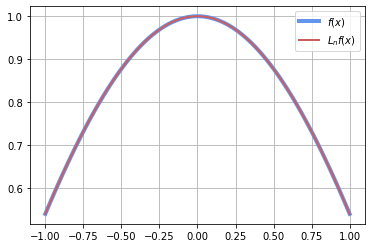

In [ ]:
n = 20
x = np.linspace(-1., 1., n)
f = lambda x: np.cos(x)

y = f(x)
grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)
interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()

9. Try the same test with the function: $$ f_a(x) = \frac{1}{1 + 25x^2} $$ 


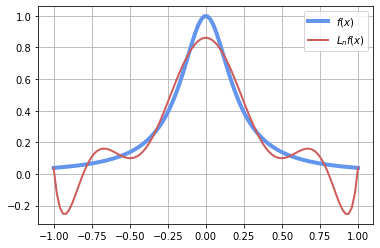

In [ ]:
n = 10
x = np.linspace(-1., 1., n)
f = lambda x: 1/(1+25*x**2)

y = f(x)
grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)

interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()

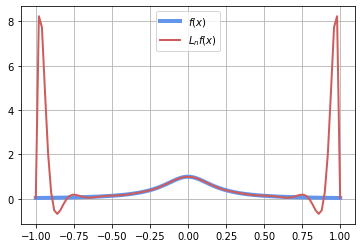

In [ ]:
n = 20
x = np.linspace(-1., 1., n)
f = lambda x: 1/(1+25*x**2)

y = f(x)
grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)

interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()

10. Play with the the parameters to try to improve the interpolation. How does it behave with larger n ?
This is known as Runge's phenomenon.

I found the best interpolation to be with n = 10, because afterwards the Runge phenomenon gets too impactful.

With larger n, the interpolation isn't better, even if the polynomial becomes of higher and higher degree. It's actually more precise in the center, but overall and especially on the sides, it doesn't, because it generates those waves, those extreme peaks and lows on the edges of the segment we are considering here. And that's the Runge phenomenon. It happens because we are having a polynomial of degree higher but our points are still evenly spaced, so we don't have enough where they're needed. Something better would be piecewise polynomials, where the number of polynomials increase with n but not the degree. And there we would win in precision. The fact that the degree increases makes the polynomial go crazy but not more precise.

11. Change the interpolation points to the Tchebychev sequence:
$$ x_i = \cos(\frac{2i + 1}{2n} \pi) $$
How do you explain the result ?

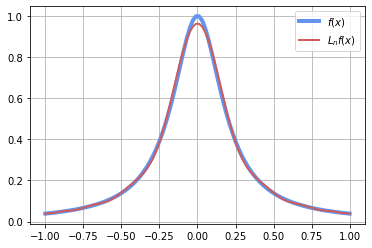

In [ ]:
n = 20
x,y = [],[]
for i in range(n):
    x.append(np.cos((2*i+1)*np.pi/(2*n)))
    y.append(f(x[i]))
f = lambda x: 1/(1+25*x**2)

grid = np.linspace(-1, 1., 100)
f_grid = f(grid)

newton_coefs = divided_differences_(x, y)

interpol = evaluate(grid, newton_coefs, x)

plt.figure()
plt.plot(grid, f_grid, lw=4, color='cornflowerblue', label=r'$f(x)$')
plt.plot(grid, interpol, lw=2, color='indianred', label=r'$L_nf(x)$')
plt.grid()
plt.legend()
plt.show()

The result is that the approximation is much cleaner on the edges ! The fact that the points are much more scattered and not evenly spaced allow the interpolation to be better OVERALL and notably on the edges, so we don't have that Runge phenomenon this time around. However, it is at the cost of precision in the center, (the site density is less important around here) which can be seen as the interpolation function doesn't reach as high as the original function. But we prefer far more THIS version with the Tchebychev sites that doesn't go extremely high or low on the edges to the previous evenly spaced one.


12. To explain this, let's evaluate the quality of our approximation. Consider $x = x_{n+1}$. Using the first question, provide a formula for $a_n$ as a function of $e(x) = f(x) - L_{n} f(x)$ and $w_{n+1}(x)$. (Note from Guillaume : the comma between $L_n$ and $f(x)$ induced me in error for quite a long time... but the definition of error had to be true. I removed it here.)

$$\forall k, \quad L_k f - L_{k-1}f = a_k w_k$$
$$\iff {k=n+1} \quad L_{n+1} f - L_nf = a_{n+1} w_{n+1}$$
We now apply this equality in $x=x_{n+1}$
$$\iff {k=n+1} \quad f(x_{n+1}) - L_nf(x_{n+1}) = a_{n+1} w_{n+1}(x_{n+1})$$
</br>
$$\iff a_{n+1} = \dfrac{f(x) - L_nf(x)}{w_{n+1}(x)} \fbox{$=\dfrac{e(x)}{w_{n+1}(x)}$}$$

13. Show that there exists $s$ such that:
    $$e(t) = \frac{f^{(n+1)} (s)}{(n+1)!} w_{n+1}(x) $$

I don't think it's possible to show this, and furthermore there seems to be 3 different variables here ($t, s$ and $x$) so I'll show what I think is coherent :
</br>This result comes from the Taylor-Lagrange formula applied to our polynomial decomposition. I haven't found exactly what to apply it on, as $w_{n+1}$ is of degree $n$ so it's pretty hard to make $(n+1)!$ appear with derivations of this term, but here is my idea. 
$$ f \in C^{\infty} \implies f(x) = \sum_{k=0}^{\infty} \dfrac{(x-c)^k}{k!}f^k(x) $$
As $c$ is arbitrary (in our $]a,b[$ segment), we can take $c=x_{n+1}$, and with Q12. we have
$$\iff a_{n+1}w_{n+1}(x) = e(x) = \sum_{k=0}^{\infty} \dfrac{(x-x_{n+1})^k}{k!}f^k(x_{n+1}) - L_nf(x) $$
We derivate the previous equation $n$ times and take it at $x=x_{n+1}$, so every term below and above the degree $n$ vanishes. This yields
$$\iff a_{n+1}(n)! = f^{n}(x)-0$$
So we almost have the result, and what I did show is that, combined with Q12. :
$$e(x) = \frac{f^{(n)} (x)}{n!} w_{n+1}(x)  $$

I am certain that the true Taylor-Lagrange formula, with the existence of a $c \in ]a,b[$ such that $$f(b) = \sum_{k=0}^n \dfrac{(b-a)^k}{k!}f^{(k)}(a) + \dfrac{(b-a)^{(n+1)}}{(n+1)!}f^{(n+1)}(c) $$ could have also been useful, but I couldn't make it work, I don't know what to take for $f$, for instance $f-L_nf$ doesn't work, it's exactly what I did above but the degree of $w_{n+1}$ is too low at only $n$...

<strong> Theorem 2.1.7 + Lemma (Rolle p) 2.1.6 </strong></br>There is actually a proof in the poly for this . We build a certain $g = f - L_{n+1}f$ function that has n+1 roots, and is n+1 times derivable, which allows us to get a y such that $g^{n+1}(y) = 0$. Also by construction of $L_nf$ we have that $L_{n+1}f^{(n+1)}(y) = (L_nf - C\omega_{n+1})^{(n+1)}(y) = C(n+1)!$ and with the equation $g^{(n+1)}(y) = 0$ we can find the value of $C$. To conclude we then go back to the expression of the error $E_n(x) = f(x) - L_nf(x) = Cw_{n+1}(x)$ and we replace the value of C.</br>
Avec ce $w_n$ polyônome élémentaire, permettant avec C la construction du polynôme $q$ s'annulant en tous les $x_i$ et en gardant la généralité du coefficient principal. 

But this proof in the poly made me realize that I was right and that the énoncé was actually not correct. Here is the right line, there are only two 'unknowns': 
    $$e(x) = \frac{f^{(n+1)} (y_x)}{(n+1)!} w_{n+1}(x) $$ With that $y_x$ such that $g^{(n+1)}(y_x)=0$ thanks to lemma 2.1.6.
    </br> And there the proof makes sense and the problem also makes sense. 

14. Compute the norm of $w_{n+1}(x)$ for both sequences $(x_k)_k$ for different sizes $n$. What do you observe ? 

In [ ]:
def norm(x_seq):
    tmp = 1
    for i in range(len(x_seq)-1):
        tmp *= (x_seq[i]-x_seq[len(x_seq)-1])
    return abs(tmp)

x=[]
for i in range(n):
    x.append(np.cos((2*i+1)*np.pi/(2*n)))
print('norm of wn+1(x) for tchebychev sequence')
print(norm(x))
print('norm of wn+1(x) for evenly spaced sequence')
x = np.linspace(-1., 1., n)
print(norm(x))

#As we can see, |wn+1(x)| is much much lower (~1%) when the associated sequence (xi) is the chebychev one,
#which explains why the method is much better. The error is just lower thanks to that. 

norm of wn+1(x) for tchebychev sequence
0.00048620204327325426
norm of wn+1(x) for evenly spaced sequence
0.03223636917510294


We can actually write $e(|wn+1(x)|_{Cheby}) << e(|wn+1(x)|_{evenly})$ 
which explains why the method is much better.

# TD 3 - Exercise 4 - Quadrature Methods

<h4><strong> Q1. Method of order 2 for a = 0, b = 1</strong></h4>

$I_{0,1}(f) = \int_{0}^{1} f(x) \, \mathrm{d}x$ and $Î_{0,1}(f) = \lambda_0f(0)+\lambda_1f(1)+\lambda_2f'(0)$
</br> We want this method to be of order 2, so that means we want Î to be correct for polynoms of degree ${0,1,2}$ but incorrect for polynoms of degree $\geq 3$. By linearity, the equalities for degrees ${0,1,2}$ yield :
$$\left \{
\begin{array}{rcl}
deg 0 : \quad \int_{0}^{1}  1 \, \mathrm{d}x = Î_{0,1}(1) = 1 = \lambda_0 + \lambda_1 \\
deg 1 : \quad \int_{0}^{1}  x \, \mathrm{d}x = Î_{0,1}(X) = \dfrac{1}{2} = \lambda_1 + \lambda_2 \\
deg 2 : \quad \int_{0}^{1}  x^2 \, \mathrm{d}x = Î_{0,1}(X^2) = \dfrac{1}{3} = \lambda_1 
\end{array}
\right.$$
$$\left \{
\begin{array}{rcl}
\lambda_0=\dfrac{2}{3} \\
\lambda_1=\dfrac{1}{3} \\
\lambda_2=\dfrac{1}{6} 
\end{array}
\right.$$
We now compute $Î_{0,1}(X^3)$ to check by linearity if the method is actually incorrect for degrees $\geq 3$ :
$$\int_{0}^{1}  x^3 \, \mathrm{d}x = \dfrac{1}{4} \ne \dfrac{1}{3} = \lambda_1 = 0 + 1\lambda_1 + 0 \quad \quad ((X^3)'|_0 = 3X^2|_0 = 0)$$
All in all, for $(\lambda_0, \lambda_1, \lambda_2) = (\dfrac{2}{3},\dfrac{1}{3},\dfrac{1}{6})$, by linearity the method is correct for polynoms of degree $\leq 2$ and incorrect for polynoms of degree $\geq 3$ which exactly means the method is of order 2.

<h4><strong> Q2. General case</strong></h4>

The first idea that came to my mind was to say that these new $(\lambda_0, \lambda_1, \lambda_2)$ are actually the same as before (hence the "deduce"), because if these new values work for all $(a,b)$, they must work for $(a=0, b=1)$ as well ! And we already computed the values for such particular a and b. But maybe there's a catch (for instance a factor $(b-a)$ which amounts to $1$ when we take our particular case...) so I will still do the computations, because even though we expect a similar result, it won't be exactly the same as previously. </br>
I detailed a lot in the previous question, I will go faster in the explanations around, while still detailing the computations, that are a bit harder. </br>
This time, we have the general case for $(a,b)$ and $Î_{a,b}(f) = (b-a)(\lambda_0f(a)+\lambda_1f(b)+\lambda_2f'(a))$. By linearity, the equalities for degrees ${0,1,2}$ yield :
$$\left \{
\begin{array}{rcl}
deg 0 : \quad Î_{a,b}(1) = b-a = (b-a)(\lambda_0 + \lambda_1) \\
deg 1 : \quad Î_{a,b}(X) = \dfrac{b^2-a^2}{2} = (b-a)(\lambda_0a + \lambda_1b + \lambda_2) \\
deg 2 : \quad Î_{a,b}(X^2) = \dfrac{b^3-a^3}{3} = (b-a)(\lambda_0a^2 + \lambda_1b^2 + 2\lambda_2b)
\end{array}
\right.$$
</br></br>
$$\left \{
\begin{array}{rcl}
deg 0 : \quad (\lambda_0 + \lambda_1) = 1 \\
deg 1 : \quad (\lambda_0a + \lambda_1b + \lambda_2) = \dfrac{b+a}{2}\\
deg 2 : \quad (\lambda_0a^2 + \lambda_1b^2 + 2\lambda_2b) = \dfrac{b^2+ab+a^2}{3}
\end{array}
\right.$$
</br></br>
$$\left \{
\begin{array}{rcl}
deg 0 : \quad \lambda_0 = 1 - \lambda_1\\
deg 1 : \quad \lambda_2 = (b-a)(\dfrac{1}{2}-\lambda_1)\\
deg 2 : \quad \lambda_1(b^2-a^2-2(b-a)b) + a^2 + b^2 - ab= \dfrac{b^2+ab+a^2}{3}
\end{array}
\right.$$ </br>
Let's focus on the last equation and find $\lambda_1$ :
$$(3) \iff \lambda_1(-a^2-b^2+2ab) = \dfrac{-2b^2+4ab-2a^2}{3} \iff -\lambda_1(a-b)^2 = -2\dfrac{(a-b)^2}{3} \iff \lambda_1 = \dfrac{1}{3}$$
We use that to find $\lambda_0$ :
$$\lambda_0 = 1 - \lambda_1 = \dfrac{2}{3} $$
and $\lambda_2$ as well :
$$\lambda_2 = (b-a)(\dfrac{1}{2}-\lambda_1) = \dfrac{b-a}{6}$$
In the end, we almost have the same result, but as I mentioned earlier, we have a $(b-a)$ factor that is equal to $1$ for $(a,b)=(0,1)$ and that we couldn't foresee. 
</br> $$(\lambda_0, \lambda_1, \lambda_2) = (\dfrac{2}{3},\dfrac{1}{3},\dfrac{b-a}{6})$$

Guillaume CAPITAN 07/03/2022 01:35